In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from astropy.table import Table, unique
from astropy.timeseries import lombscargle
import astropy.units as u
import pandas as pd

In [45]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [46]:
df2 = pd.read_csv('../lightcurves/xrt/NAME_NGC_1313_X-1,hardrat_join.csv', dtype={'obsID':'str'})
df2 = df2[df2['BAND'] == 'HR']
df2

,MJD,Err (pos),Err(neg),Rate,Error,obsID,MODE,BAD,UL,BAND
2,53769.955864,0.000087,-0.000087,4.159947,4.783737,00035473001,PC,True,False,HR
5,53907.542494,0.442892,-0.442892,1.199083,0.099942,00035473002,PC,False,False,HR
8,54427.799480,0.174789,-0.174789,1.122804,0.134525,00036555001,PC,False,False,HR
10,54439.528099,0.138517,-0.138517,1.109003,0.128515,00036555002,PC,False,False,HR
14,55064.115615,0.005833,-0.005833,1.028153,0.277514,00031442001,PC,False,False,HR
...,...,...,...,...,...,...,...,...,...,...
1517,59648.232686,0.005151,-0.005151,1.080190,0.363011,00036555205,PC,False,False,HR
1519,59655.596877,0.004861,-0.004861,0.565728,0.191315,00036555206,PC,False,False,HR
1521,59662.319302,0.037295,-0.037295,0.763413,0.204907,00036555207,PC,False,False,HR
1525,59669.389357,0.006109,-0.006109,0.944376,0.208137,00036555208,PC,False,False,HR


In [47]:
t_min_cut = 56300
df = pd.read_csv('../lightcurves/xrt/NAME_NGC_1313_X-1,curve_nosys_join.csv', dtype={'obsID':'str'})
df = df[df['BAD'] == False]
df = df[df['Ratepos'] != 0]

df = df[df['MJD'] > t_min_cut]
df


,MJD,T_+ve,T_-ve,Rate,Ratepos,Rateneg,obsID,MODE,BAD,UL,BAND
37,56453.885412,0.039443,-0.039443,0.089572,0.009086,-0.009086,00031442034,PC,False,False,FULL
38,56454.449908,0.069378,-0.069378,0.087293,0.008535,-0.008535,00031442035,PC,False,False,FULL
39,56455.650009,0.135964,-0.135964,0.092583,0.009547,-0.009547,00031442036,PC,False,False,FULL
40,56456.084383,0.037699,-0.037699,0.081915,0.007978,-0.007978,00031442037,PC,False,False,FULL
41,56457.057538,0.008982,-0.008982,0.096500,0.009375,-0.009375,00031442038,PC,False,False,FULL
...,...,...,...,...,...,...,...,...,...,...,...
505,59648.232686,0.005151,-0.005151,0.089818,0.015296,-0.015296,00036555205,PC,False,False,FULL
506,59655.596877,0.004861,-0.004861,0.138869,0.023389,-0.023389,00036555206,PC,False,False,FULL
507,59662.319302,0.037295,-0.037295,0.088497,0.011923,-0.011923,00036555207,PC,False,False,FULL
508,59669.389357,0.006109,-0.006109,0.098103,0.010808,-0.010808,00036555208,PC,False,False,FULL


In [48]:
df_join = pd.merge(left=df,right=df2, on='obsID')
df_join

,MJD_x,T_+ve,T_-ve,Rate_x,Ratepos,Rateneg,obsID,MODE_x,BAD_x,UL_x,BAND_x,MJD_y,Err (pos),Err(neg),Rate_y,Error,MODE_y,BAD_y,UL_y,BAND_y
0,56453.885412,0.039443,-0.039443,0.089572,0.009086,-0.009086,00031442034,PC,False,False,FULL,56453.885412,0.039443,-0.039443,1.044152,0.211879,PC,False,False,HR
1,56454.449908,0.069378,-0.069378,0.087293,0.008535,-0.008535,00031442035,PC,False,False,FULL,56454.449908,0.069378,-0.069378,0.979248,0.189686,PC,False,False,HR
2,56455.650009,0.135964,-0.135964,0.092583,0.009547,-0.009547,00031442036,PC,False,False,FULL,56455.650009,0.135964,-0.135964,1.518759,0.320173,PC,False,False,HR
3,56456.084383,0.037699,-0.037699,0.081915,0.007978,-0.007978,00031442037,PC,False,False,FULL,56456.084383,0.037699,-0.037699,0.969436,0.188851,PC,False,False,HR
4,56457.057538,0.008982,-0.008982,0.096500,0.009375,-0.009375,00031442038,PC,False,False,FULL,56457.057538,0.008982,-0.008982,1.719452,0.347016,PC,False,False,HR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,59648.232686,0.005151,-0.005151,0.089818,0.015296,-0.015296,00036555205,PC,False,False,FULL,59648.232686,0.005151,-0.005151,1.080190,0.363011,PC,False,False,HR
462,59655.596877,0.004861,-0.004861,0.138869,0.023389,-0.023389,00036555206,PC,False,False,FULL,59655.596877,0.004861,-0.004861,0.565728,0.191315,PC,False,False,HR
463,59662.319302,0.037295,-0.037295,0.088497,0.011923,-0.011923,00036555207,PC,False,False,FULL,59662.319302,0.037295,-0.037295,0.763413,0.204907,PC,False,False,HR
464,59669.389357,0.006109,-0.006109,0.098103,0.010808,-0.010808,00036555208,PC,False,False,FULL,59669.389357,0.006109,-0.006109,0.944376,0.208137,PC,False,False,HR


In [66]:
def plot_color(x, y, y_err, z, ax, norm, cmap='viridis'):
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(z)
    lc.set_linewidth(1)
    
    c = plt.cm.viridis(norm(z))
    ax.scatter(x, y, c=c, marker='s', s=30)
    #ax.errorbar(x, y, yerr=y_err, c=c, marker='s', ls='none', capsize=1.0, lw=1.0)
    line = ax.add_collection(lc)

    cbar = fig.colorbar(line, ax=ax)
    cbar.set_label('Hardness Ratio')

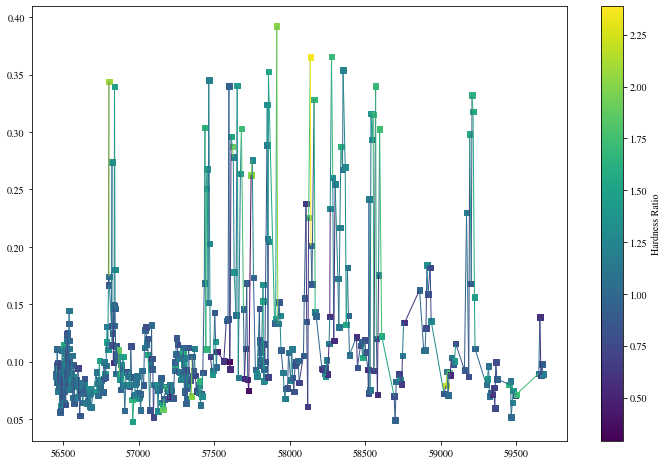

In [67]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
norm = plt.Normalize(df_join['Rate_y'].min(), df_join['Rate_y'].max())
plot_color(df_join['MJD_x'], df_join['Rate_x'], 2*df_join['Ratepos'], df_join['Rate_y'], ax=ax, norm=norm)

Text(0, 0.5, 'XRT 0.2 - 10.0 keV Rate (ct/s)')

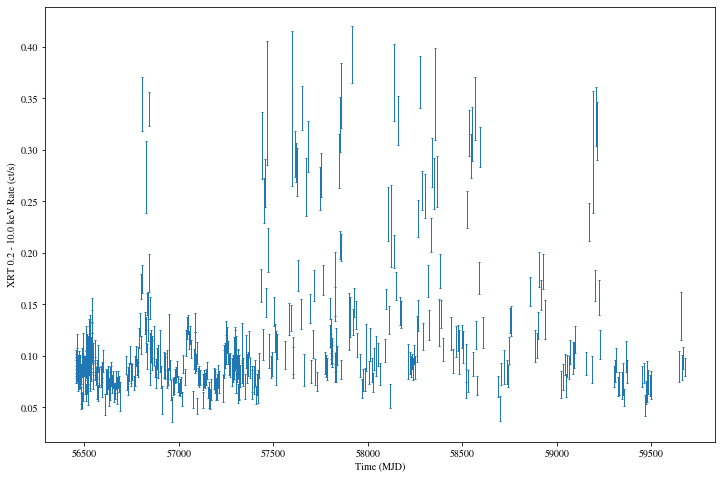

In [21]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.errorbar(df['MJD'], df['Rate'], yerr=(df['Rateneg'].abs(), df['Ratepos']), ls='none', lw=1.0, capsize=1.0)
ax.set_xlabel('Time (MJD)')
ax.set_ylabel('XRT 0.2 - 10.0 keV Rate (ct/s)')

#plt.savefig('../figures/NGC1313_XRT.pdf')

<ErrorbarContainer object of 3 artists>

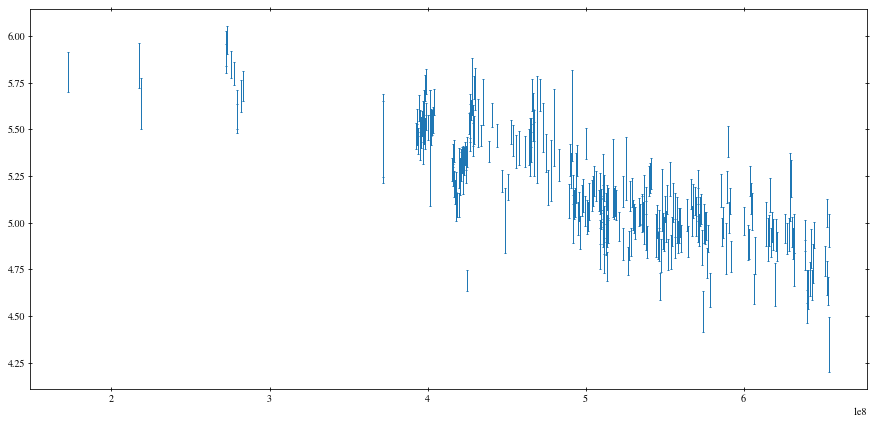

In [16]:
tab = Table.read('../lightcurves/uvot/NAME_NGC_1313_X-1,UVOT_U.fits')
tab = unique(tab, keys=['TSTART'])
tab = tab[tab['COI_SRC_RATE'] < 6]
tab = tab[tab['COI_SRC_RATE'] > 4]
tab
fig, ax = plt.subplots(figsize=(15,7))
ax.tick_params(axis='both', direction ='inout', which='both', top=True, right=True)
ax.errorbar(tab['TSTART'], tab['COI_SRC_RATE'], yerr=tab['COI_SRC_RATE_ERR'], ls='none', capsize=1.0, lw=1.0)

In [94]:
t = df['MJD'].values * u.day
y = df['Rate'].values
y_err = 2*df['Ratepos'].values

<ErrorbarContainer object of 3 artists>

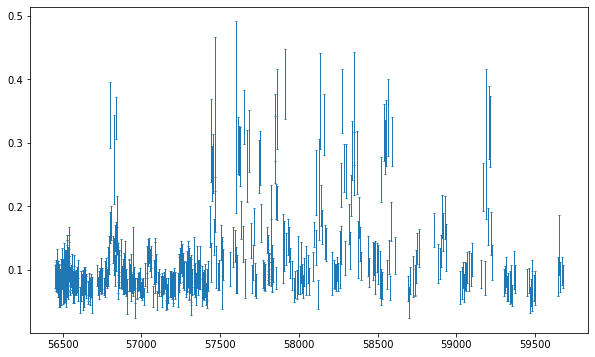

In [95]:
plt.figure(figsize=(10,6))
plt.errorbar(t, y, yerr=y_err, ls='none', lw=1.0, capsize=1.0)

In [ ]:
def sample_timeseries(df, seed=42)
    

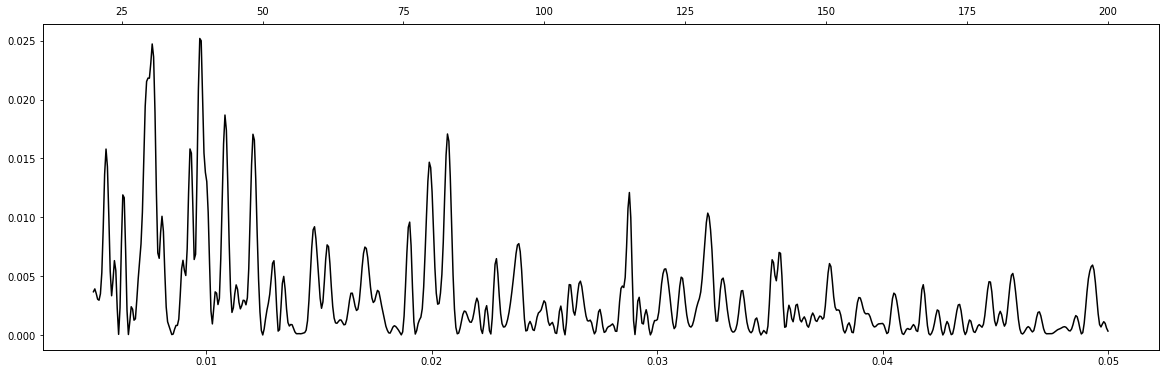

In [145]:
ls = lombscargle.LombScargle(t=t, y=y, dy=y_err, normalization='standard')
t_max = 200*u.day
t_min = 20*u.day

f, power = ls.autopower(minimum_frequency=1/t_max, maximum_frequency=1/t_min)

fig, ax = plt.subplots(figsize=(20,6))
ax.plot(f,power, color='black')
ax2 = ax.twiny()
ax2.plot(1/f, power, color='none')


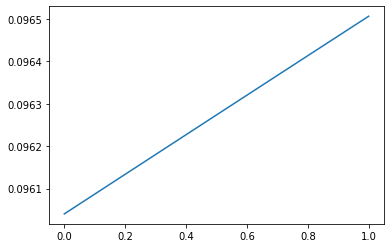

In [133]:
best_frequency = f[np.argmax(power)]
t_fit = np.linspace(0, 1) * u.day
m = ls.model(t_fit, best_frequency)
plt.plot(t_fit, m)

In [69]:
import numpy as np
t_diff = np.diff(t)

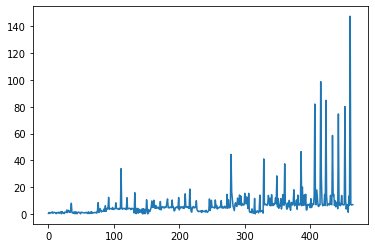

In [62]:
plt.plot(t_diff)